In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the beneficiary data
beneficiary_train = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Beneficiarydata-1542865627584.csv')
beneficiary_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Beneficiarydata-1542969243754.csv')

# Load the inpatient data
inpatient_train = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Inpatientdata-1542865627584.csv')
inpatient_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Inpatientdata-1542969243754.csv')

# Load the outpatient data
outpatient_train = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Outpatientdata-1542865627584.csv')
outpatient_test = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Outpatientdata-1542969243754.csv')

# Load the labels
train_labels = pd.read_csv('Medicare-Fraud-Detection-DS/Train-1542865627584.csv')
test_labels = pd.read_csv('Medicare-Fraud-Detection-DS/Test-1542969243754.csv')


In [3]:
# Basic information
print(beneficiary_train.info())

# Summary statistics for numerical features
print(beneficiary_train.describe())

# Summary statistics for categorical features
print(beneficiary_train.describe(include=['object']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [4]:
inpatient_train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
outpatient_train

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [6]:
print(inpatient_train.info())
print(inpatient_train.describe())

print(outpatient_train.info())
print(outpatient_train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [7]:
print(inpatient_train.isnull().sum())
print(outpatient_train.isnull().sum())


BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64
BeneID                     

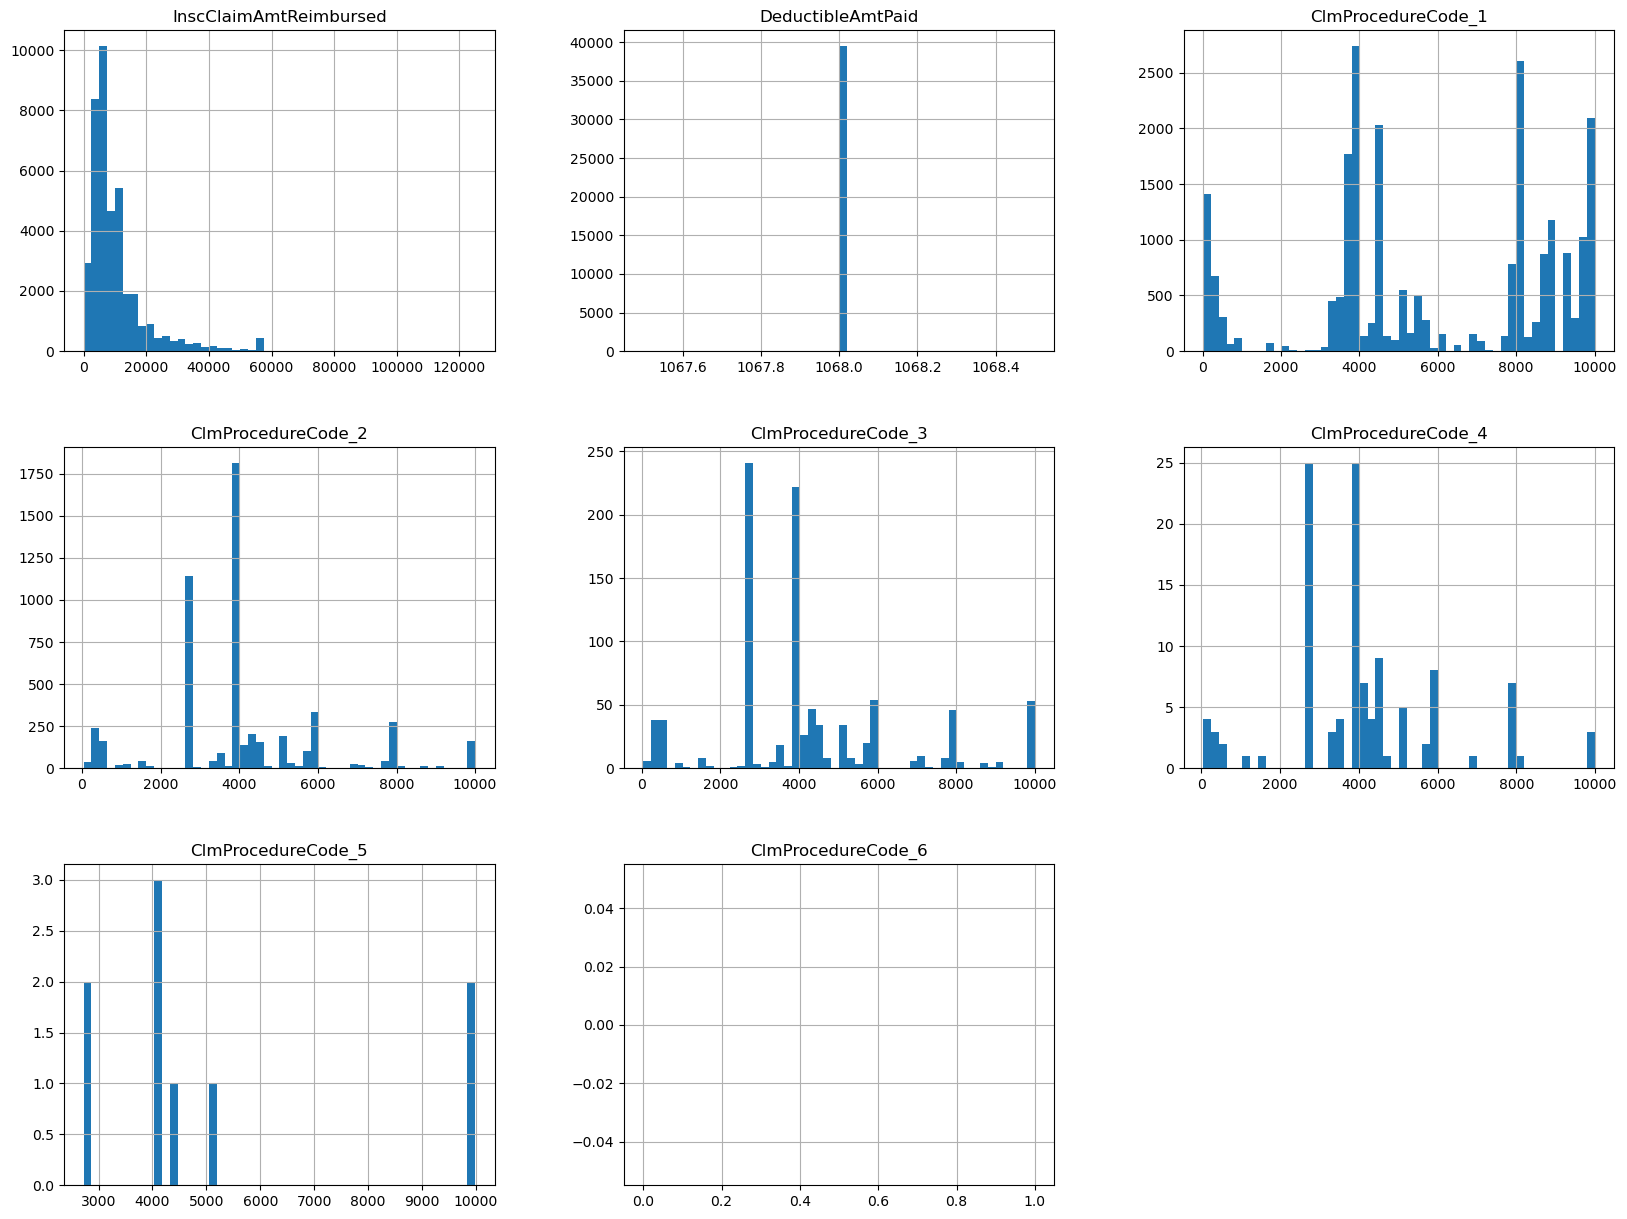

In [8]:
inpatient_train.hist(bins=50, figsize=(20,15))
plt.show()


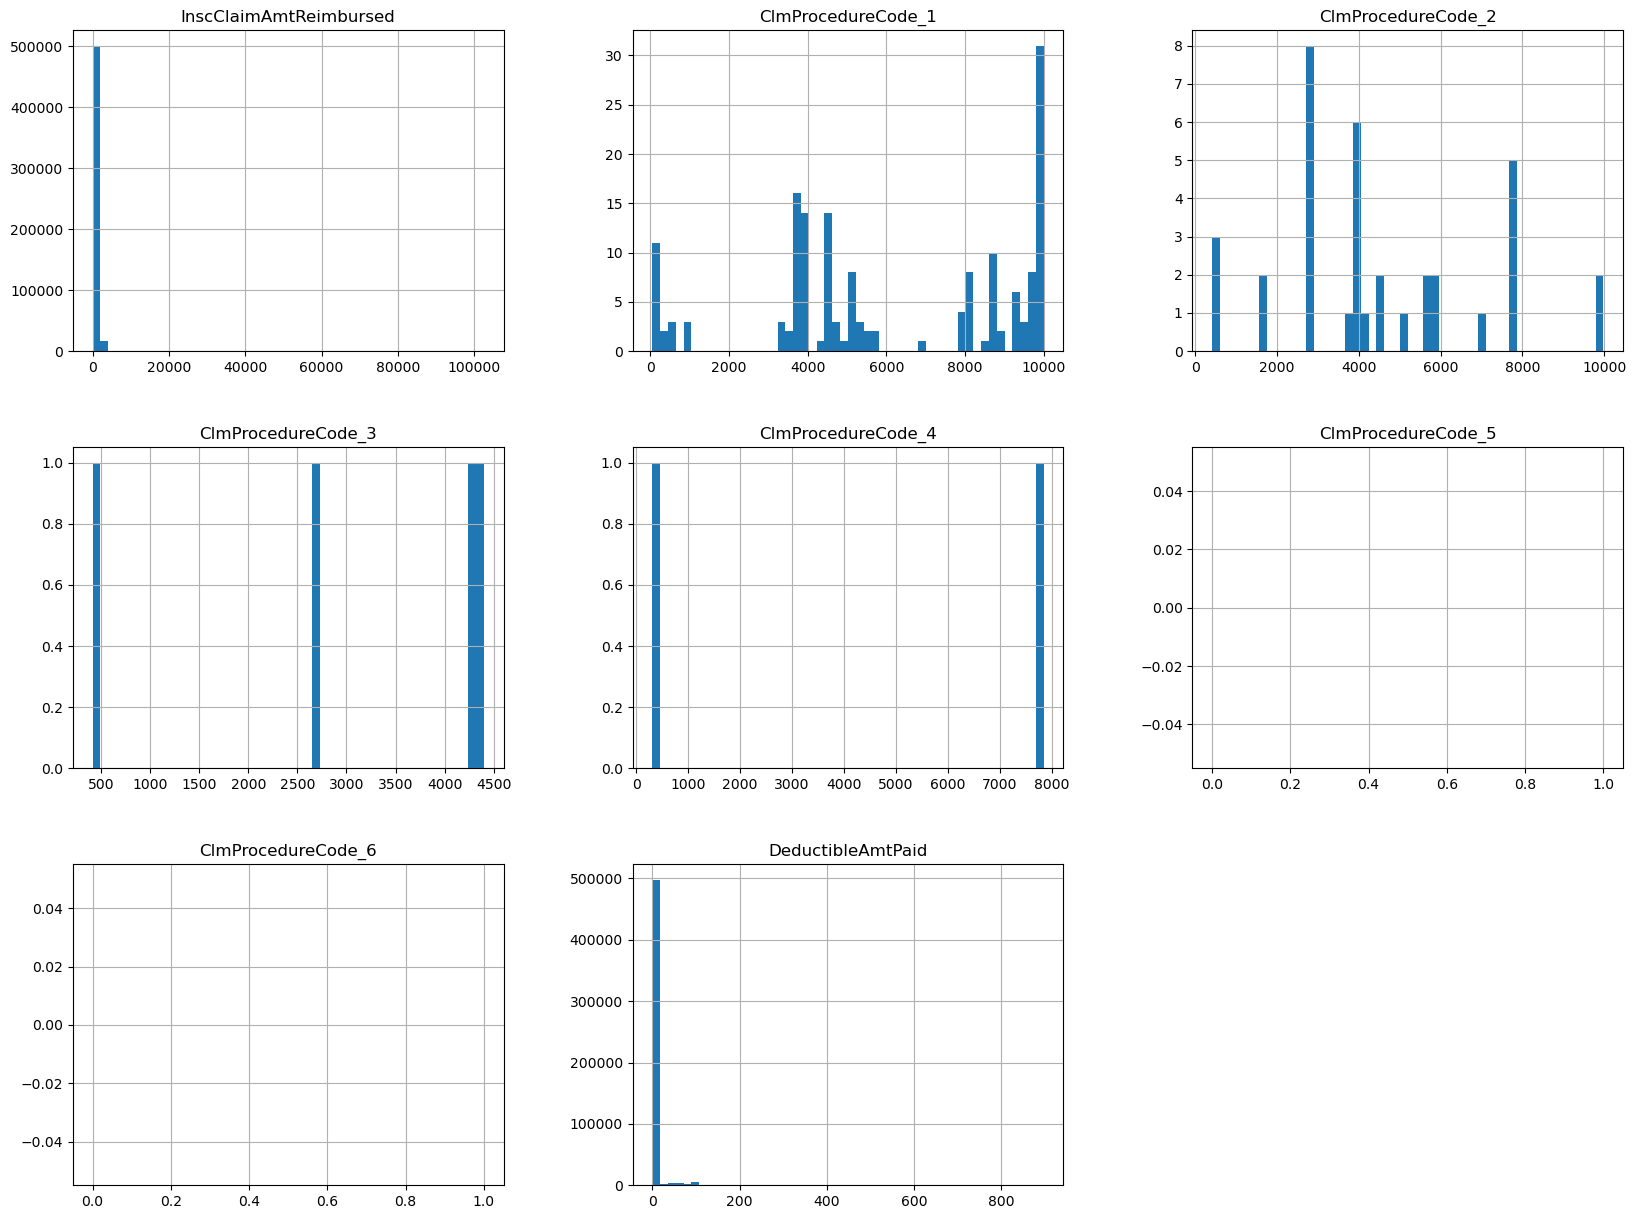

In [9]:
outpatient_train.hist(bins=50, figsize=(20,15))
plt.show()


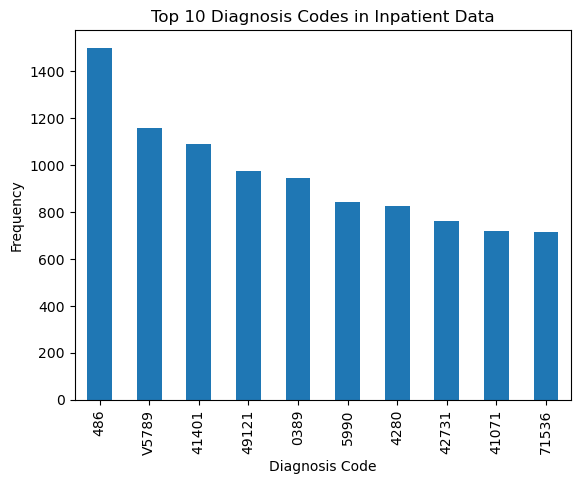

In [10]:
# Example for diagnosis code
inpatient_train['ClmDiagnosisCode_1'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Diagnosis Codes in Inpatient Data')
plt.xlabel('Diagnosis Code')
plt.ylabel('Frequency')
plt.show()


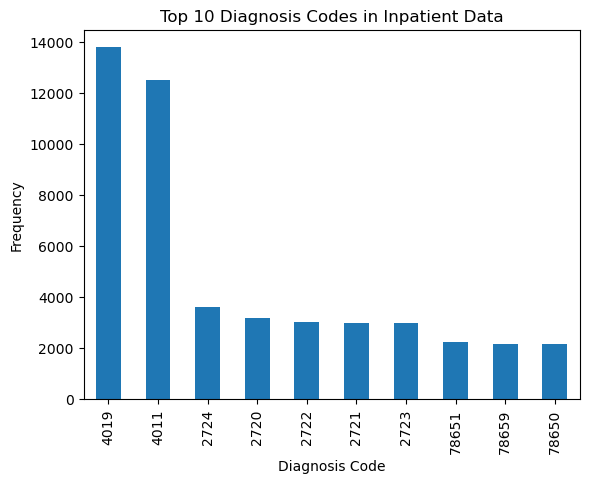

In [11]:
# Example for diagnosis code
outpatient_train['ClmDiagnosisCode_1'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Diagnosis Codes in Inpatient Data')
plt.xlabel('Diagnosis Code')
plt.ylabel('Frequency')
plt.show()


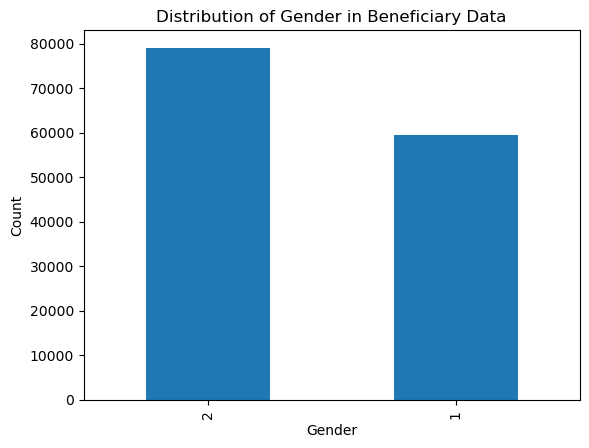

In [12]:
beneficiary_train['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender in Beneficiary Data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [13]:
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',              
            'ChronicCond_ObstrPulmonary' , 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   'ChronicCond_Osteoporasis',         
'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke']
for condition in chronic_conditions:
    print(f"{condition}: {beneficiary_train[condition].mean()}")


ChronicCond_Alzheimer: 1.6678166228817228
ChronicCond_Heartfailure: 1.506322353416669
ChronicCond_KidneyDisease: 1.6876425416438119
ChronicCond_Cancer: 1.8800412829469673
ChronicCond_ObstrPulmonary: 1.7628467911891221
ChronicCond_Depression: 1.6444758797886776
ChronicCond_Diabetes: 1.3981422673864718
ChronicCond_IschemicHeart: 1.3241433066774444
ChronicCond_Osteoporasis: 1.7253168394006755
ChronicCond_rheumatoidarthritis: 1.7431796529922918
ChronicCond_stroke: 1.9209417130979531


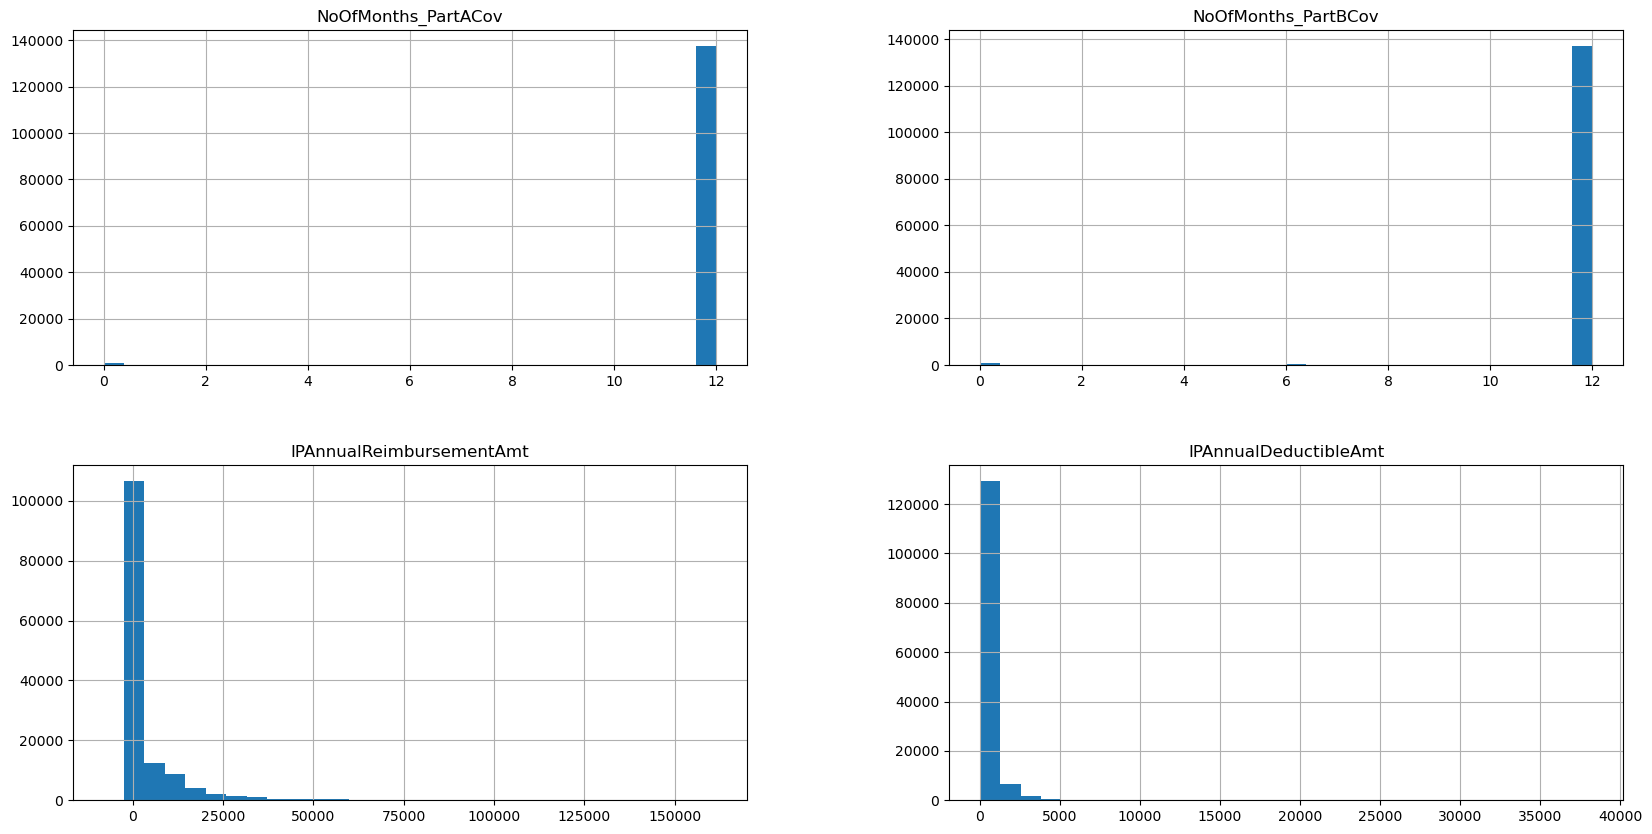

In [14]:
beneficiary_train[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].hist(bins=30, figsize=(20,10))
plt.show()


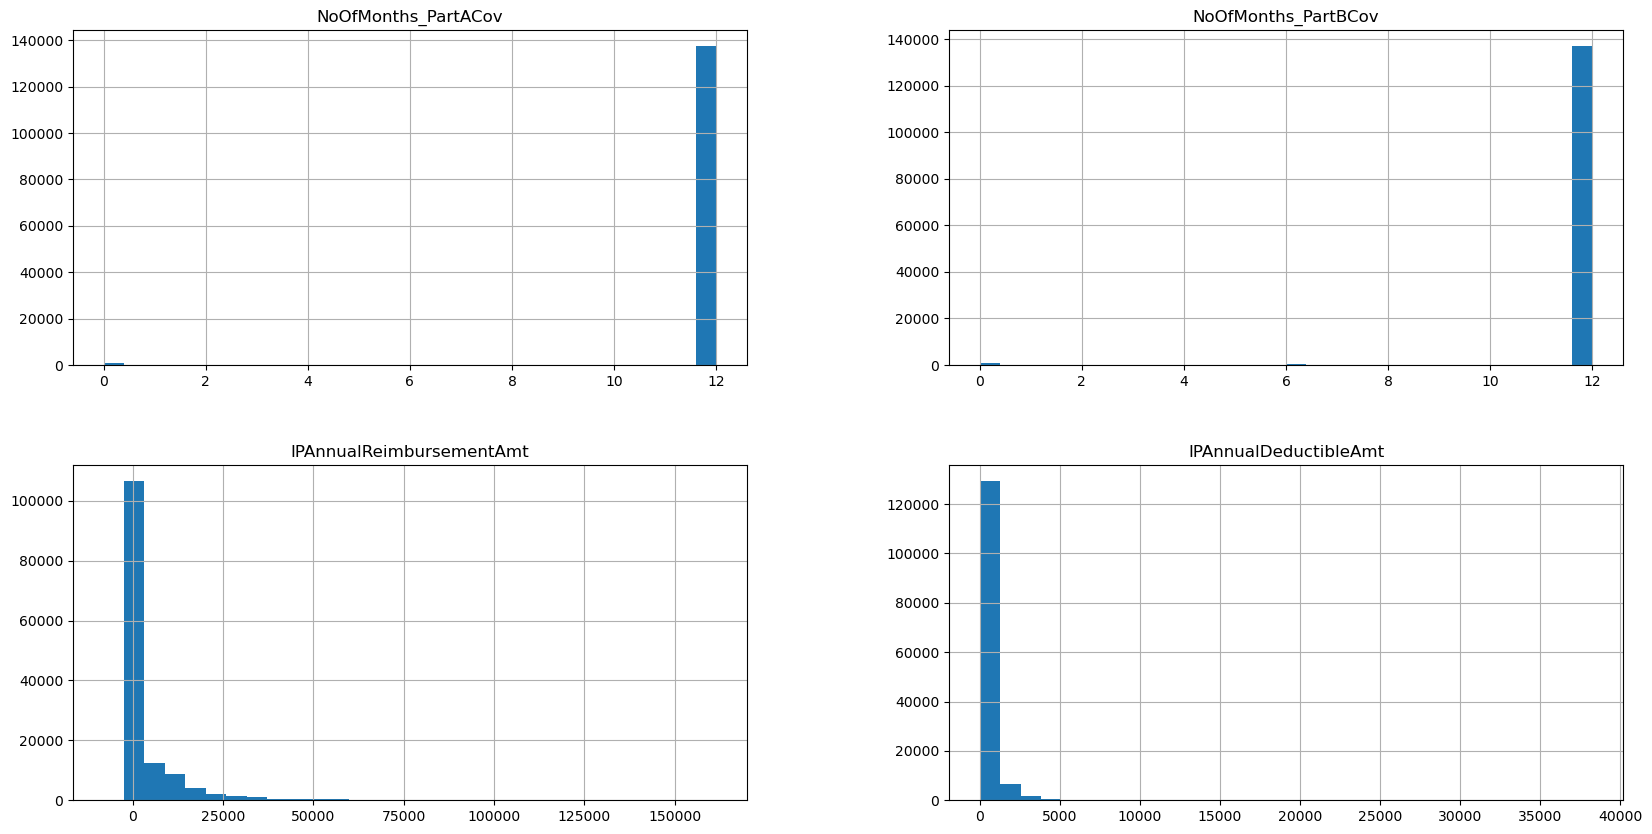

In [15]:
beneficiary_train[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].hist(bins=30, figsize=(20,10))
plt.show()


In [16]:
train_labels

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [17]:
beneficiary_train.keys()

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [18]:
inpatient_train.keys()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [19]:
outpatient_train.keys()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [20]:
# Merge inpatient data with beneficiary data
inpatient_train_merged = inpatient_train.merge(beneficiary_train, on='BeneID', how='left')

# Merge outpatient data with beneficiary data
outpatient_train_merged = outpatient_train.merge(beneficiary_train, on='BeneID', how='left')


In [21]:
# Encode 'PotentialFraud' as a numerical variable
train_labels['PotentialFraud'] = train_labels['PotentialFraud'].map({'Yes': 1, 'No': 0})


In [22]:
# Merge inpatient data with train labels
inpatient_train_merged = inpatient_train_merged.merge(train_labels, on='Provider', how='left')

# Merge outpatient data with train labels
outpatient_train_merged = outpatient_train_merged.merge(train_labels, on='Provider', how='left')


In [23]:
outpatient_train_merged.keys()

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCo

In [24]:
# Convert date columns to datetime format
inpatient_train_merged['DOB'] = pd.to_datetime(inpatient_train_merged['DOB'])
inpatient_train_merged['DOD'] = pd.to_datetime(inpatient_train_merged['DOD'])
inpatient_train_merged['ClaimStartDt'] = pd.to_datetime(inpatient_train_merged['ClaimStartDt'])
inpatient_train_merged['ClaimEndDt'] = pd.to_datetime(inpatient_train_merged['ClaimEndDt'])
inpatient_train_merged['AdmissionDt'] = pd.to_datetime(inpatient_train_merged['AdmissionDt'])
inpatient_train_merged['DischargeDt'] = pd.to_datetime(inpatient_train_merged['DischargeDt'])


outpatient_train_merged['DOB'] = pd.to_datetime(outpatient_train_merged['DOB'])
outpatient_train_merged['DOD'] = pd.to_datetime(outpatient_train_merged['DOD'])
outpatient_train_merged['ClaimStartDt'] = pd.to_datetime(outpatient_train_merged['ClaimStartDt'])
outpatient_train_merged['ClaimEndDt'] = pd.to_datetime(outpatient_train_merged['ClaimEndDt'])

# Calculate age for beneficiaries
inpatient_train_merged['Age'] = (inpatient_train_merged['DOD'].fillna(pd.to_datetime('today')) - inpatient_train_merged['DOB']).dt.days // 365
outpatient_train_merged['Age'] = (outpatient_train_merged['DOD'].fillna(pd.to_datetime('today')) - outpatient_train_merged['DOB']).dt.days // 365


# Calculate claim duration for inpatient and outpatient data
inpatient_train_merged['ClaimDuration'] = (inpatient_train_merged['ClaimEndDt'] - inpatient_train_merged['ClaimStartDt']).dt.days

# Calculate admission duration for inpatient data
inpatient_train_merged['AdmissionDuration'] = (inpatient_train_merged['DischargeDt'] - inpatient_train_merged['AdmissionDt']).dt.days


# One-hot encode categorical features
categorical_features_i = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
                        'ClmAdmitDiagnosisCode', 'BeneID', 'ClaimID', 
                        'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                        'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                        'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                        'ClmDiagnosisCode_10', 'RenalDiseaseIndicator', 'DiagnosisGroupCode', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'Provider']

categorical_features_o = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
                        'ClmAdmitDiagnosisCode', 'BeneID', 'ClaimID', 
                        'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                        'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                        'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
                        'ClmDiagnosisCode_10', 'RenalDiseaseIndicator', 'Provider']

# Initialize a label encoder
label_encoder = LabelEncoder()

# Label encode categorical features in the inpatient and outpatient datasets
for feature in categorical_features_i:
    inpatient_train_merged[feature + '_label'] = label_encoder.fit_transform(inpatient_train_merged[feature].astype(str))
    
for feature in categorical_features_o:
    outpatient_train_merged[feature + '_label'] = label_encoder.fit_transform(outpatient_train_merged[feature].astype(str))

# Drop the original categorical columns
inpatient_train_merged.drop(columns=categorical_features_i, inplace=True)
outpatient_train_merged.drop(columns=categorical_features_o, inplace=True)



In [25]:
# Calculate total reimbursement amount for inpatient and outpatient data
inpatient_train_merged['TotalReimbursementAmt'] = inpatient_train_merged['IPAnnualReimbursementAmt'] + inpatient_train_merged['OPAnnualReimbursementAmt']
outpatient_train_merged['TotalReimbursementAmt'] = outpatient_train_merged['IPAnnualReimbursementAmt'] + outpatient_train_merged['OPAnnualReimbursementAmt']

# Calculate chronic condition count for inpatient and outpatient data
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']  # Add all chronic condition columns
inpatient_train_merged['ChronicConditionCount'] = inpatient_train_merged[chronic_conditions].sum(axis=1)
outpatient_train_merged['ChronicConditionCount'] = outpatient_train_merged[chronic_conditions].sum(axis=1)

# Calculate average claim duration for inpatient and outpatient data
inpatient_train_merged['AverageClaimDuration'] = inpatient_train_merged.groupby('Provider_label')['ClaimDuration'].transform('mean')

# Calculate frequency of attending physicians for inpatient and outpatient data
inpatient_train_merged['AttendingPhysicianFrequency'] = inpatient_train_merged.groupby('Provider_label')['AttendingPhysician_label'].transform('count')
outpatient_train_merged['AttendingPhysicianFrequency'] = outpatient_train_merged.groupby('Provider_label')['AttendingPhysician_label'].transform('count')

# Calculate beneficiary risk score for inpatient and outpatient data
inpatient_train_merged['BeneficiaryRiskScore'] = inpatient_train_merged['Age'] + inpatient_train_merged['ChronicConditionCount'] + inpatient_train_merged['TotalReimbursementAmt']
outpatient_train_merged['BeneficiaryRiskScore'] = outpatient_train_merged['Age'] + outpatient_train_merged['ChronicConditionCount'] + outpatient_train_merged['TotalReimbursementAmt']


In [26]:
# Identify categorical columns in the inpatient dataset
inpatient_categorical_columns = inpatient_train_merged.select_dtypes(include=['object']).columns
print("Categorical columns in the inpatient dataset:")
print(inpatient_categorical_columns)

# Identify categorical columns in the outpatient dataset
outpatient_categorical_columns = outpatient_train_merged.select_dtypes(include=['object']).columns
print("\nCategorical columns in the outpatient dataset:")
print(outpatient_categorical_columns)


Categorical columns in the inpatient dataset:
Index([], dtype='object')

Categorical columns in the outpatient dataset:
Index([], dtype='object')


In [27]:
inpatient_train_merged.keys()

Index(['ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed', 'AdmissionDt',
       'DischargeDt', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'PotentialFraud',
       'Age', 'ClaimDuration', 'AdmissionDuration', 'AttendingPhysician_label',
       'OperatingPhysician_label', 'OtherPhysician_label',
       'ClmAdmitDiagnosisCode_label', 'B

In [28]:
# Calculate correlation for the encoded inpatient data
inpatient_encoded_corr = inpatient_train_merged.corr()
print(inpatient_encoded_corr['PotentialFraud'].sort_values(ascending=False))

# Calculate correlation for the encoded outpatient data
outpatient_encoded_corr = outpatient_train_merged.corr()
print(outpatient_encoded_corr['PotentialFraud'].sort_values(ascending=False))


PotentialFraud                 1.000000
AttendingPhysicianFrequency    0.517432
ClmProcedureCode_5             0.406764
OtherPhysician_label           0.073965
AverageClaimDuration           0.071787
                                 ...   
State                         -0.019492
Provider_label                -0.042567
ClmProcedureCode_4            -0.070415
County                        -0.074690
ClmProcedureCode_6                  NaN
Name: PotentialFraud, Length: 63, dtype: float64
PotentialFraud                     1.000000
ClmProcedureCode_4                 1.000000
AttendingPhysicianFrequency        0.533134
ClmProcedureCode_3                 0.084073
Race                               0.026795
County                             0.018735
Age                                0.007697
OPAnnualDeductibleAmt              0.006658
NoOfMonths_PartACov                0.006036
OPAnnualReimbursementAmt           0.004533
ChronicCond_Depression             0.004266
BeneID_label               

/Users/megha/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


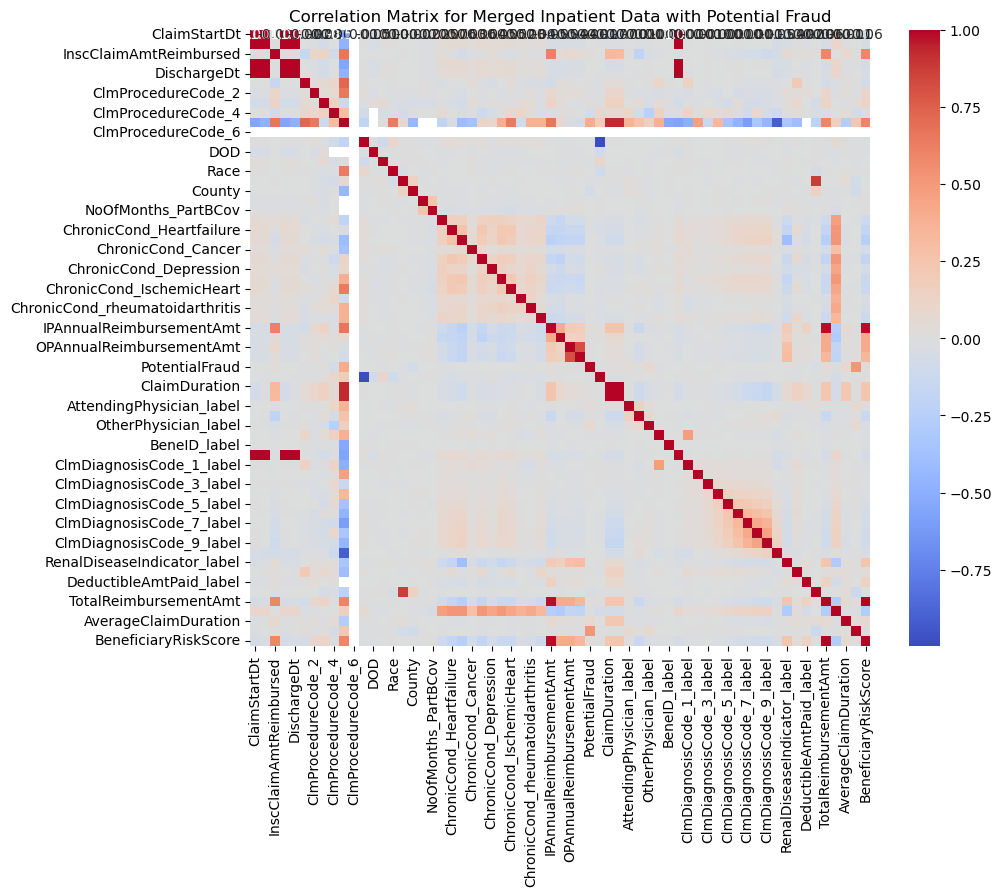

/Users/megha/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


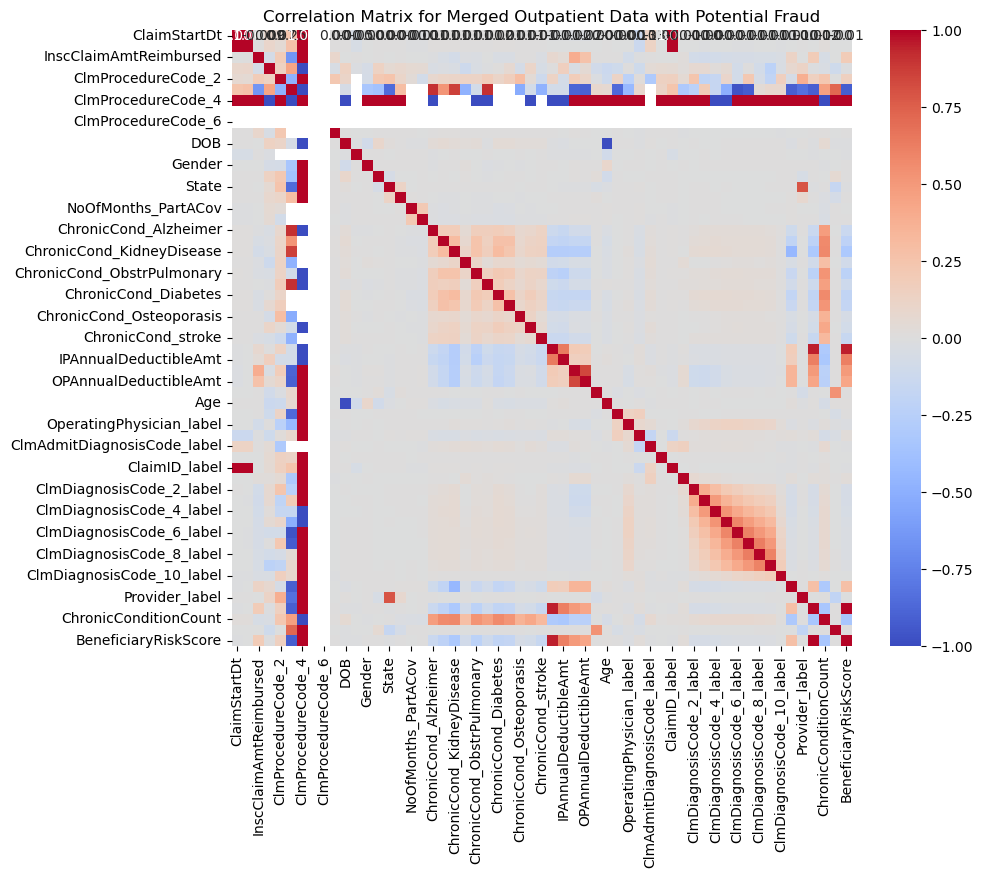

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Inpatient data
plt.figure(figsize=(10, 8))
sns.heatmap(inpatient_encoded_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Merged Inpatient Data with Potential Fraud")
plt.show()

# Outpatient data
plt.figure(figsize=(10, 8))
sns.heatmap(outpatient_encoded_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Merged Outpatient Data with Potential Fraud")
plt.show()


In [31]:
# Calculate correlation for the inpatient data
inpatient_corr = inpatient_train_merged.corr()
inpatient_features = inpatient_corr[abs(inpatient_corr['PotentialFraud']) > 0.01].index.tolist()

# Calculate correlation for the outpatient data
outpatient_corr = outpatient_train_merged.corr()
outpatient_features = outpatient_corr[abs(outpatient_corr['PotentialFraud']) > 0.01].index.tolist()

# Combine the feature lists, removing duplicates
inpatient_train_merged = inpatient_train_merged[inpatient_features]
outpatient_train_merged = outpatient_train_merged[outpatient_features]

In [32]:
outpatient_train_merged

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,Race,State,County,PotentialFraud,AttendingPhysician_label,OtherPhysician_label,Provider_label,AttendingPhysicianFrequency
0,NaN,NaN,NaN,NaN,1,39,280,1,9159,44388,3726,2833
1,NaN,NaN,NaN,NaN,1,52,590,0,31170,44388,4894,32
2,NaN,NaN,NaN,NaN,1,52,590,0,10806,44388,4883,56
3,NaN,NaN,NaN,NaN,1,39,270,1,14065,44388,3726,2833
4,NaN,NaN,NaN,NaN,1,39,270,1,55907,44388,3726,2833
...,...,...,...,...,...,...,...,...,...,...,...,...
517732,NaN,NaN,NaN,NaN,1,21,20,0,31956,27089,2026,359
517733,NaN,NaN,NaN,NaN,1,21,20,0,67383,44388,2029,1010
517734,NaN,NaN,NaN,NaN,1,21,20,0,30086,44388,2006,471
517735,NaN,NaN,NaN,NaN,1,21,20,0,55520,39207,2018,561


In [33]:
final_train_dataset = pd.concat([inpatient_train_merged, outpatient_train_merged], axis=0)


In [34]:
# Fill missing values for AdmissionDuration with 0 in the outpatient data
final_train_dataset['AdmissionDuration'] = final_train_dataset['AdmissionDuration'].fillna(0)


In [35]:
# Calculate correlation for the final dataset
final_corr = final_train_dataset.corr()

# Identify features with correlation higher than 0.01
final_features = final_corr[abs(final_corr['PotentialFraud']) > 0.01].index.tolist()

# Keep only the selected features in the final dataset
final_train_dataset = final_train_dataset[final_features]


In [36]:
# Drop duplicates if any
final_train_dataset.drop_duplicates(inplace=True)


In [37]:
final_train_dataset

,InscClaimAmtReimbursed,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,State,County,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,PotentialFraud,...,AttendingPhysician_label,OtherPhysician_label,ClmAdmitDiagnosisCode_label,Provider_label,TotalReimbursementAmt,AverageClaimDuration,AttendingPhysicianFrequency,BeneficiaryRiskScore,ClmProcedureCode_1,Race
0,26000.0,NaN,NaN,NaN,NaN,39,230,36000.0,60.0,1,...,7483,2877,1464.0,1543,36060.0,6.466667,60,36156.0,NaN,NaN
1,5000.0,NaN,NaN,NaN,NaN,39,230,36000.0,60.0,0,...,657,2877,1127.0,1540,36060.0,5.766667,60,36156.0,NaN,NaN
2,5000.0,NaN,NaN,NaN,NaN,39,230,36000.0,60.0,0,...,5789,319,400.0,1585,36060.0,5.142857,14,36156.0,NaN,NaN
3,5000.0,NaN,NaN,NaN,NaN,1,360,5000.0,250.0,0,...,5542,920,679.0,540,5250.0,4.000000,22,5376.0,NaN,NaN
4,10000.0,NaN,NaN,NaN,NaN,45,780,21260.0,120.0,0,...,6412,2877,1432.0,1753,21380.0,6.800000,15,21483.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517704,NaN,NaN,NaN,NaN,NaN,49,530,NaN,NaN,0,...,7496,44388,NaN,4576,NaN,NaN,393,NaN,NaN,1.0
517706,NaN,NaN,NaN,NaN,NaN,49,530,NaN,NaN,1,...,15929,44388,NaN,339,NaN,NaN,8240,NaN,NaN,1.0
517708,NaN,NaN,NaN,NaN,NaN,6,150,NaN,NaN,0,...,67478,44388,NaN,678,NaN,NaN,22,NaN,NaN,1.0
517718,NaN,NaN,NaN,NaN,NaN,6,150,NaN,NaN,0,...,4011,22727,NaN,2511,NaN,NaN,85,NaN,NaN,1.0


In [38]:
nan_counts = final_train_dataset.isna().sum()
print(nan_counts)

InscClaimAmtReimbursed         255971
ClmProcedureCode_2             290955
ClmProcedureCode_3             295476
ClmProcedureCode_4             296327
ClmProcedureCode_5             296436
State                               0
County                              0
IPAnnualReimbursementAmt       255971
OPAnnualReimbursementAmt       255971
PotentialFraud                      0
ClaimDuration                  255971
AdmissionDuration                   0
AttendingPhysician_label            0
OtherPhysician_label                0
ClmAdmitDiagnosisCode_label    255971
Provider_label                      0
TotalReimbursementAmt          255971
AverageClaimDuration           255971
AttendingPhysicianFrequency         0
BeneficiaryRiskScore           255971
ClmProcedureCode_1             296283
Race                            40474
dtype: int64


In [39]:
# Calculate the number of NaN values in each column
nan_counts = final_train_dataset.isna().sum()

# Identify columns with more than 29,000 NaN values
columns_to_remove = nan_counts[nan_counts > 290000].index

# Remove the identified columns from the dataset
final_train_dataset.drop(columns=columns_to_remove, inplace=True)


In [40]:
final_train_dataset.fillna(0, inplace=True)


In [41]:
final_train_dataset.keys()

Index(['InscClaimAmtReimbursed', 'State', 'County', 'IPAnnualReimbursementAmt',
       'OPAnnualReimbursementAmt', 'PotentialFraud', 'ClaimDuration',
       'AdmissionDuration', 'AttendingPhysician_label', 'OtherPhysician_label',
       'ClmAdmitDiagnosisCode_label', 'Provider_label',
       'TotalReimbursementAmt', 'AverageClaimDuration',
       'AttendingPhysicianFrequency', 'BeneficiaryRiskScore', 'Race'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = final_train_dataset.drop('PotentialFraud', axis=1)
y = final_train_dataset['PotentialFraud']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_validation)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_validation, y_pred))


Accuracy: 0.7759786806996238
Precision: 0.7086077927877638
Recall: 0.6115821931007901
F1 Score: 0.6565296095164209

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     38533
           1       0.71      0.61      0.66     20756

    accuracy                           0.78     59289
   macro avg       0.76      0.74      0.75     59289
weighted avg       0.77      0.78      0.77     59289



In [46]:
# Merge inpatient test data with beneficiary test data
inpatient_test_merged = inpatient_test.merge(beneficiary_test, on='BeneID', how='left')

# Merge outpatient test data with beneficiary test data
outpatient_test_merged = outpatient_test.merge(beneficiary_test, on='BeneID', how='left')


In [47]:
# Calculate age for beneficiaries in the test data
inpatient_test_merged['Age'] = (pd.to_datetime('today') - pd.to_datetime(inpatient_test_merged['DOB'])).dt.days // 365
outpatient_test_merged['Age'] = (pd.to_datetime('today') - pd.to_datetime(outpatient_test_merged['DOB'])).dt.days // 365

# Calculate claim duration for inpatient and outpatient test data
inpatient_test_merged['ClaimDuration'] = (pd.to_datetime(inpatient_test_merged['ClaimEndDt']) - pd.to_datetime(inpatient_test_merged['ClaimStartDt'])).dt.days
outpatient_test_merged['ClaimDuration'] = (pd.to_datetime(outpatient_test_merged['ClaimEndDt']) - pd.to_datetime(outpatient_test_merged['ClaimStartDt'])).dt.days

# Calculate admission duration for inpatient test data
inpatient_test_merged['AdmissionDuration'] = (pd.to_datetime(inpatient_test_merged['DischargeDt']) - pd.to_datetime(inpatient_test_merged['AdmissionDt'])).dt.days

# Define a function to handle unseen labels during label encoding
def handle_unseen_labels(label_encoder, series):
    labels = series.astype(str)
    mask = labels.isin(label_encoder.classes_)
    labels[~mask] = 'unseen'
    label_encoder.classes_ = np.append(label_encoder.classes_, 'unseen')
    return label_encoder.transform(labels)

# Label encode categorical features in the test data with handling unseen labels
for feature in categorical_features_i:
    inpatient_test_merged[feature + '_label'] = handle_unseen_labels(label_encoder, inpatient_test_merged[feature])
    
for feature in categorical_features_o:
    outpatient_test_merged[feature + '_label'] = handle_unseen_labels(label_encoder, outpatient_test_merged[feature])

# Drop the original categorical columns in the test data
inpatient_test_merged.drop(columns=categorical_features_i, inplace=True)
outpatient_test_merged.drop(columns=categorical_features_o, inplace=True)

# Fill NaN values with 0
inpatient_test_merged.fillna(0, inplace=True)
outpatient_test_merged.fillna(0, inplace=True)


In [48]:
# Calculate chronic condition count for inpatient and outpatient data
# Calculate chronic condition count for inpatient and outpatient data
chronic_conditions = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']  # Add all chronic condition columnsinpatient_test_merged['ChronicConditionCount'] = inpatient_test_merged[chronic_conditions].sum(axis=1)

# Calculate total reimbursement amount for inpatient and outpatient data
inpatient_test_merged['TotalReimbursementAmt'] = inpatient_test_merged['IPAnnualReimbursementAmt'] + inpatient_train_merged['OPAnnualReimbursementAmt']
outpatient_test_merged['TotalReimbursementAmt'] = outpatient_test_merged['IPAnnualReimbursementAmt'] + outpatient_test_merged['OPAnnualReimbursementAmt']

inpatient_test_merged['ChronicConditionCount'] = inpatient_test_merged[chronic_conditions].sum(axis=1)
outpatient_test_merged['ChronicConditionCount'] = outpatient_test_merged[chronic_conditions].sum(axis=1)

# Calculate average claim duration for inpatient and outpatient data
inpatient_test_merged['AverageClaimDuration'] = inpatient_test_merged.groupby('Provider_label')['ClaimDuration'].transform('mean')
outpatient_test_merged['AverageClaimDuration'] = outpatient_test_merged.groupby('Provider_label')['ClaimDuration'].transform('mean')

# Calculate frequency of attending physicians for inpatient and outpatient data
inpatient_test_merged['AttendingPhysicianFrequency'] = inpatient_test_merged.groupby('Provider_label')['AttendingPhysician_label'].transform('count')
outpatient_test_merged['AttendingPhysicianFrequency'] = outpatient_test_merged.groupby('Provider_label')['AttendingPhysician_label'].transform('count')

# Calculate beneficiary risk score for inpatient and outpatient data
inpatient_test_merged['BeneficiaryRiskScore'] = inpatient_test_merged['Age'] + inpatient_test_merged['ChronicConditionCount'] + inpatient_train_merged['TotalReimbursementAmt']
outpatient_test_merged['BeneficiaryRiskScore'] = outpatient_test_merged['Age'] + outpatient_test_merged['ChronicConditionCount'] + outpatient_test_merged['TotalReimbursementAmt']

In [49]:
outpatient_test_merged['AdmissionDuration'] = 0


In [50]:
# Keep only the columns that are present in the final training dataset
inpatient_test_final = inpatient_test_merged[final_train_dataset.columns.drop('PotentialFraud')]
outpatient_test_final = outpatient_test_merged[final_train_dataset.columns.drop('PotentialFraud')]


In [51]:
# Concatenate inpatient and outpatient test datasets
final_test_dataset = pd.concat([inpatient_test_final, outpatient_test_final], axis=0)


In [52]:
# Scale the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(final_test_dataset)


In [53]:
# Make predictions on the scaled test data
y_test_pred = model.predict(X_test_scaled)


/Users/megha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [54]:
print(y_test_pred)

[1 1 1 ... 1 1 1]


In [56]:
# Extract the predicted labels for inpatient test data
inpatient_pred_labels = y_test_pred[:len(inpatient_test_merged)]

# Add the predicted labels to the inpatient_test dataframe
inpatient_test['PredictedPotentialFraud'] = inpatient_pred_labels


In [57]:
# Create a CSV file with the results
inpatient_test[['Provider', 'PredictedPotentialFraud']].to_csv('inpatient_test_predictions.csv', index=False)
